# Housing price project

The prediction of housing price is a regression problem.

In this notebook, I am working on prediction of housing price in which I use a data set fetched from Kaggle. This data set includes both numeric and non-numeric features.

At first, I'll only take numerical features into account and try to trains model only based off them.
Later I'll try to solve the problem while considering both numerical and non-numerical features of data. 




Prediction contains different steps:
1) Data prepreocessing,

2) Data cleaning,

    1) Impute
    2) Scaling
    3) 
    
3) ML model

In [46]:
# import common libraries
import numpy as np
import pandas as pd
import copy

In [47]:
# Read the data set from files inside the same folder as this notebook
trainset = pd.read_csv('trainHP.csv')
testset = pd.read_csv('testHP.csv')

# to avoid ruining the original data
dftrain = copy.deepcopy(trainset)
dftest = copy.deepcopy(testset)

# See the dimension of the dataset
print("trainset shape:", dftrain.shape)
print("testset shape:", dftest.shape)

trainset shape: (1460, 81)
testset shape: (1459, 80)


### Extract features and target from data set  

In [48]:
features = dftrain.drop('SalePrice',axis=1,inplace=False)
target = dftrain['SalePrice']

In [49]:
# Due to the metric by Kaggle we take the logarithm of the price 
Y = np.log(target)

### Seperate numeric and non-numeric columns in features

In [50]:
# Select numeric columns from data frame
features_numeric = features.select_dtypes(include=[np.number])
# the line below gives a numpy array including column names of numeric features.
numcol = features_numeric.columns
#print(type(features_numeric.columns.values))

# select non-numeric columns from data frame
features_nonnumeric = features.select_dtypes(exclude=[np.number])
noncol = features_nonnumeric.columns.values
#print('a list of nonnumeric features:')

In [51]:
noncol

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

### Observe numeric data set 

In [52]:
features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [53]:
features_numeric.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,205,0,4,0,0,0,0,0,1,2008


As you can see in the data frame above, some of the samples contain a `NaN` as value for a feature or more. `NaN` is a place holder for missing values, values that are absent in the datasent for some reason.

In [54]:
Null=features_numeric.isnull().sum()
print("The number of columns including missing values in numeric features is ", Null[Null>0].count())
Null[Null>0]

The number of columns including missing values in numeric features is  3


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### Data Visualization

In [55]:
import matplotlib.pyplot as plt

(array([1454.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

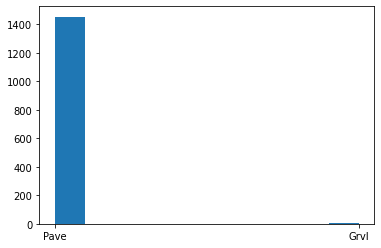

In [56]:
plt.hist(features_nonnumeric['Street'])

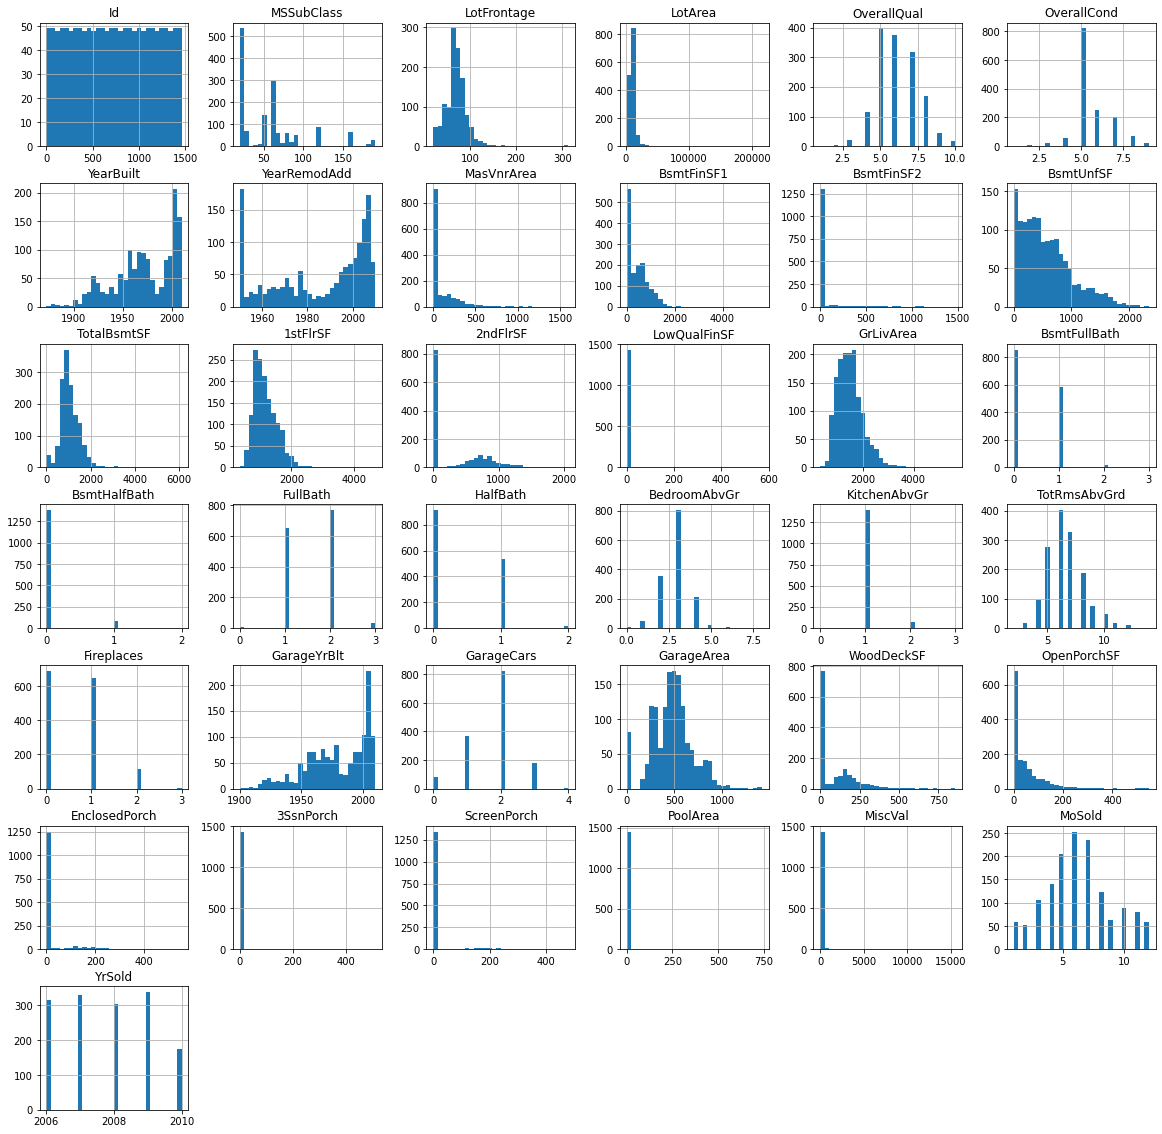

In [57]:
features_numeric.hist(bins=30,figsize=(20,20))
plt.show()

(array([1151.,    0.,  218.,    0.,    0.,   10.,    0.,   65.,    0.,
          16.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

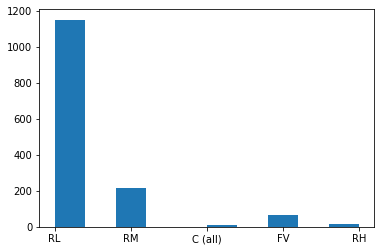

In [58]:
plt.hist(features_nonnumeric.MSZoning)

### Data cleaning

The simplest solution is to drop missing values. However, I decided to fill the missing values with mean value of corresponding column.

In [59]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# the following line gives a numpy arry
features_numeric_imputed = imp_mean.fit_transform(features_numeric)

# we should make it as pandas Data Frame
features_numeric_imputed = pd.DataFrame(features_numeric_imputed, columns=numcol)

features_numeric_imputed.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.000000,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.000000,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.000000,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.000000,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.000000,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
5,6.0,50.0,85.000000,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,...,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0
6,7.0,20.0,75.000000,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,...,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
7,8.0,60.0,70.049958,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,...,484.0,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0
8,9.0,50.0,51.000000,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,...,468.0,90.0,0.0,205.0,0.0,0.0,0.0,0.0,4.0,2008.0
9,10.0,190.0,50.000000,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,...,205.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0


Finally, again I check numeric columns looking for further missing value, expecting none.

In [60]:
Null=features_numeric_imputed.isnull().sum()
Null[Null>0].count()

0

### Feature Scaling
There are two methods:
* StandardScaler: makes the mean of observed values zero and standard deviation one. Resulted Data will have both negative and positive values.

    * It's more benefitial for datasets with inputs having different scales.
    
* MinMax: maps each value into a new value ranging from 0 to 1 


! Please note that the following code snippets marked with a Star* are alternatives. ONLY ONE of them should be executed. 

### * Data Standarization (StandardScaler)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# The line below gives numpy array,
features_numeric_scaled = scaler.fit_transform(features_numeric_imputed)

# Create a pandas Data Frame
features_numeric_scaled = pd.DataFrame(features_numeric_scaled, columns=numcol)

features_numeric_scaled.head(10)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730865,0.073375,-2.293718e-01,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,4.519361e-01,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,-9.311018e-02,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-4.564744e-01,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,6.336182e-01,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
5,-1.719002,-0.163109,6.790387e-01,0.360616,-0.795151,-0.517200,0.719786,0.491040,-0.574410,0.632450,...,0.032844,-0.432931,-0.251539,-0.359325,10.802446,-0.270208,-0.068692,1.323736,1.360892,0.891994
6,-1.716629,-0.872563,2.248335e-01,-0.043379,1.374795,-0.517200,1.084115,0.975575,0.456019,2.029558,...,0.762732,1.283007,0.156111,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
7,-1.714256,0.073375,6.454645e-16,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.755176,0.910994,...,0.051559,1.123385,2.375537,3.372372,-0.116339,-0.270208,-0.068692,0.618024,1.730892,0.891994
8,-1.711883,-0.163109,-8.652591e-01,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.574410,-0.973018,...,-0.023301,-0.033876,-0.704483,2.995929,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.138777
9,-1.709511,3.147673,-9.106796e-01,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,-0.574410,0.893448,...,-1.253816,-0.752176,-0.644091,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,0.138777


### * Data Normalization (MinMax)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
numdataren = scaler.fit_transform(features_numeric_imputed)
numdataren.size
dfscaled = pd.DataFrame(numdataren, columns = numcol)
dfscaled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.997944,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.998629,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.999315,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [64]:
# split train set into random train and test subsets.
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(features_numeric_scaled, Y, train_size=0.7, test_size=0.3)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_valid.shape[0]}")

No. of training examples: 1021
No. of testing examples: 438


In [65]:
# prediction model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

# implement model on X_train, Y_train
model.fit(X_train, Y_train)

# prediction
Y_pre = model.predict(X_valid)
Y_pre

array([11.79433792, 12.99453001, 11.34450681, 11.00209984, 11.66134547,
       12.14950229, 11.69940503, 11.91371298, 12.31716669, 12.03765399,
       12.06527492, 12.54254488, 12.05815252, 11.9511804 , 13.12603064,
       11.51292546, 11.81672692, 12.56723749, 12.37158708, 12.44901882,
       12.01188092, 11.9511804 , 12.36734079, 12.39669301, 11.82704253,
       12.10901093, 12.0981533 , 12.32829028, 12.02574909, 12.70076889,
       11.83101549, 11.56076279, 11.9511804 , 11.89818787, 12.00701176,
       12.24047407, 11.6784399 , 11.8493977 , 12.07539432, 13.32392695,
       11.66134547, 12.27839331, 12.22587527, 11.81303006, 11.79433792,
       12.25247902, 11.6784399 , 11.7905572 , 11.6784399 , 11.40756495,
       11.41861479, 11.97035031, 12.11176197, 12.04355372, 11.48760766,
       12.12214741, 12.31716669, 11.92503512, 12.00762171, 12.59640043,
       12.15477935, 11.77528973, 11.65268741, 12.06393288, 12.16525065,
       12.27839331, 11.89818787, 12.06527492, 12.01188092, 12.04

In [66]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_valid, Y_pre)

0.1556245263708817

### Marshaling the model into a file

In [67]:
from sklearn2pmml import PMMLPipeline, sklearn2pmml

pipeline = PMMLPipeline([('regressor', DecisionTreeRegressor(random_state=1))])
pipeline.fit(X_train, Y_train)
Y_pre = pipeline.predict(X_valid)
Y_pre
sklearn2pmml(pipeline, 'housing_price_model.pmml', with_repr=True, debug=True)

python: 3.7.9
sklearn: 1.0.2
sklearn2pmml: 0.78.0
joblib: 1.1.0
sklearn_pandas: 2.2.0
pandas: 1.3.5
numpy: 1.19.5
openjdk: 17.0.2
Executing command:
java -cp /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resources/gson-2.8.9.jar:/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resources/guava-21.0.jar:/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resources/h2o-genmodel-3.36.0.1.jar:/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resources/h2o-logger-3.36.0.1.jar:/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resources/h2o-tree-api-0.3.17.jar:/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resources/istack-commons-runtime-3.0.12.jar:/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn2pmml/resourc